# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

### What are the predictors and dependent variable ?

The dependant variable for this data set is admit - whether a sudent is admitted or not. The predictor variables are those that influence this outcome - gre and gpe scores and prestige

In [37]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

Admission to college is related to gre and gpa score

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

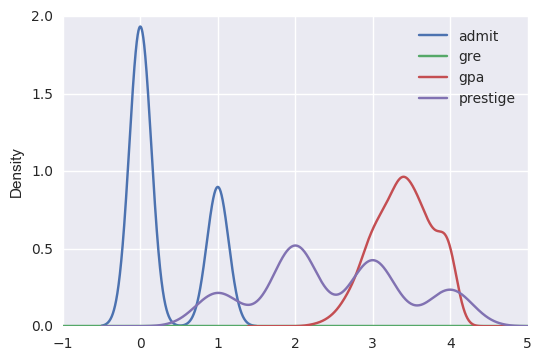

In [38]:
df.plot(kind= "density",
        xlim=(-1,5))



### FInd the correlation of each feature with admission

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.775)


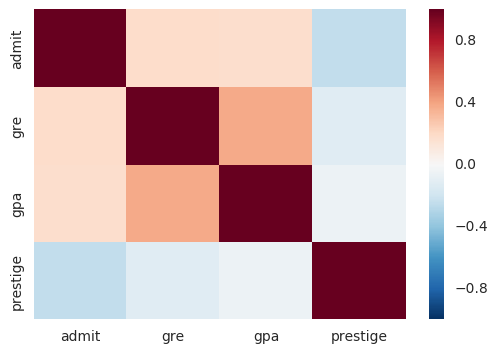

In [39]:
correlations = df.corr()
print correlations
print sns.heatmap(correlations)

### How do you deal with the prestige feature?

Prestige is a categorical variable, to perform modelling dummy variables of N-1 must be created first. In this case 3 dummy variables would be created since prestige can take one of 4 values.

### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

Since the targtet variable takes one out of 2 variables then this is a classification probelem. Therefore we can use KNN or a decision tree to predict the outcome. 

In [44]:
data = df.join(pd.get_dummies(df.prestige, prefix = 'school')) #because I can't spell prestige
data.head()

,admit,gre,gpa,prestige,school_1.0,school_2.0,school_3.0,school_4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


In [45]:
from sklearn import grid_search, cross_validation


feature_set = data[['gre', 'gpa', 'school_2', 'school_3', 'school_4']]
#gs = grid_search.GridSearchCV(
    #estimator=LogisticRegression(),
    #param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'auto']},
    #cv=cross_validation.KFold(n=len(df), n_folds=10),
    #scoring='roc_auc'
#)


#gs.fit(feature_set, df.admit)
#gs.grid_scores_
#print gs.best_estimator_


KeyError: "['school_2' 'school_3' 'school_4'] not in index"

### What is the most important feature that contributes to the students probability of admission? 

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model